# HARYANA

In [154]:
import pandas as pd

# 1. Load the three Haryana datasets
df_hr_enrolment = pd.read_csv('/content/Haryana Enrolment state.csv')
df_hr_demographic = pd.read_csv('/content/Haryana Demographic state.csv')
df_hr_biometric = pd.read_csv('/content/Haryana Biometric state.csv')

# 2. Convert 'date' columns to datetime objects
df_hr_enrolment['date'] = pd.to_datetime(df_hr_enrolment['date'], format='%d-%m-%Y')
df_hr_demographic['date'] = pd.to_datetime(df_hr_demographic['date'], format='%d-%m-%Y')
df_hr_biometric['date'] = pd.to_datetime(df_hr_biometric['date'], format='%d-%m-%Y')
print("Data Loaded Successfully")

Data Loaded Successfully


In [155]:
# 3. Perform an outer merge of df_hr_enrolment and df_hr_demographic
merged_hr_df_temp = pd.merge(df_hr_enrolment, df_hr_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')

# 4. Merge merged_hr_df_temp with df_hr_biometric to create the final merged DataFrame
df_merged_hr = pd.merge(merged_hr_df_temp, df_hr_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# 5. Identify numerical columns and replace NaN values with 0
numeric_cols = df_merged_hr.select_dtypes(include=['number']).columns
df_merged_hr[numeric_cols] = df_merged_hr[numeric_cols].fillna(0)
print("First 5 rows of df_merged_hr:")
print(df_merged_hr.head())

First 5 rows of df_merged_hr:
        date    state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Haryana   Ambala   133001      0.0       0.0             0.0   
1 2025-03-01  Haryana   Ambala   133004      0.0       0.0             0.0   
2 2025-03-01  Haryana   Ambala   133004      0.0       0.0             0.0   
3 2025-03-01  Haryana   Ambala   133005      0.0       0.0             0.0   
4 2025-03-01  Haryana   Ambala   133005      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          120.0         942.0         501.0       1132.0  
1           31.0         211.0         143.0        428.0  
2           31.0         211.0         143.0        428.0  
3           18.0         151.0          73.0        161.0  
4           18.0         151.0          73.0        161.0  


In [156]:
# 6. Print head, info, and descriptive statistics for verification
print("Haryana Enrolment Dataset:")
print(df_hr_enrolment.head())
print(df_hr_enrolment.info())
print(df_hr_enrolment.describe())

print("\nHaryana Demographic Dataset:")
print(df_hr_demographic.head())
print(df_hr_demographic.info())
print(df_hr_demographic.describe())

print("\nHaryana Biometric Dataset:")
print(df_hr_biometric.head())
print(df_hr_biometric.info())
print(df_hr_biometric.describe())

print("\nMerged Haryana DataFrame (df_merged_hr) head:")
print(df_merged_hr.head())
print("\nMerged Haryana DataFrame (df_merged_hr) info:")
print(df_merged_hr.info())
print("\nMerged Haryana DataFrame (df_merged_hr) describe:")
print(df_merged_hr.describe())

Haryana Enrolment Dataset:
        date    state district  pincode  age_0_5  age_5_17  age_18_greater
0 2025-09-01  Haryana  Bhiwani   127021       10         1               0
1 2025-09-01  Haryana  Bhiwani   127022        2         0               0
2 2025-09-01  Haryana  Bhiwani   127040        5         0               0
3 2025-09-01  Haryana  Bhiwani   127201        1         1               0
4 2025-09-01  Haryana  Bhiwani   127308        1         0               0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18608 entries, 0 to 18607
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            18608 non-null  datetime64[ns]
 1   state           18608 non-null  object        
 2   district        18608 non-null  object        
 3   pincode         18608 non-null  int64         
 4   age_0_5         18608 non-null  int64         
 5   age_5_17        18608 non-null  int64         

In [157]:
df_hr = df_merged_hr[df_merged_hr['state'] == 'Haryana'].copy()
df_hr['year'] = df_hr['date'].dt.year
df_hr['month'] = df_hr['date'].dt.month

age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_hr_agg = df_hr.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Shape of df_hr:", df_hr.shape)
print("\nFirst 5 rows of df_hr with new 'year' and 'month' columns:")
print(df_hr.head())
print("\nAggregated DataFrame (df_hr_agg) head:")
print(df_hr_agg.head())
print("\nAggregated DataFrame (df_hr_agg) info:")
print(df_hr_agg.info())

Shape of df_hr: (93905, 13)

First 5 rows of df_hr with new 'year' and 'month' columns:
        date    state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Haryana   Ambala   133001      0.0       0.0             0.0   
1 2025-03-01  Haryana   Ambala   133004      0.0       0.0             0.0   
2 2025-03-01  Haryana   Ambala   133004      0.0       0.0             0.0   
3 2025-03-01  Haryana   Ambala   133005      0.0       0.0             0.0   
4 2025-03-01  Haryana   Ambala   133005      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  year  month  
0          120.0         942.0         501.0       1132.0  2025      3  
1           31.0         211.0         143.0        428.0  2025      3  
2           31.0         211.0         143.0        428.0  2025      3  
3           18.0         151.0          73.0        161.0  2025      3  
4           18.0         151.0          73.0        161.0  2025      3  

Aggr

In [158]:
import numpy as np

# 1. Create 'totalenrolments' column
df_hr_agg['totalenrolments'] = df_hr_agg['age_0_5'] + df_hr_agg['age_5_17'] + df_hr_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_hr_agg['childenrolments'] = df_hr_agg['age_0_5'] + df_hr_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_hr_agg['totaldemoupdates'] = df_hr_agg['demo_age_5_17'] + df_hr_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_hr_agg['totalbioupdates'] = df_hr_agg['bio_age_5_17'] + df_hr_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_hr_agg['CES'] = np.where(
    df_hr_agg['totalenrolments'] == 0,
    0,
    df_hr_agg['childenrolments'] / df_hr_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_hr_agg['DUR'] = np.where(
    df_hr_agg['totalenrolments'] == 0,
    0,
    df_hr_agg['totaldemoupdates'] / df_hr_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_hr_agg['BUR'] = np.where(
    df_hr_agg['totalenrolments'] == 0,
    0,
    df_hr_agg['totalbioupdates'] / df_hr_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_hr_agg) with new metrics head:")
print(df_hr_agg.head())

Aggregated DataFrame (df_hr_agg) with new metrics head:
   year  month    state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Haryana         Ambala      0.0       0.0             0.0   
1  2025      3  Haryana        Bhiwani      0.0       0.0             0.0   
2  2025      3  Haryana  Charkhi Dadri      0.0       0.0             0.0   
3  2025      3  Haryana      Faridabad     80.0      60.0            10.0   
4  2025      3  Haryana      Fatehabad      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          449.0        3820.0        3761.0       8522.0              0.0   
1          795.0        7025.0        6393.0      12366.0              0.0   
2          452.0        3268.0         285.0        985.0              0.0   
3         3499.0       28476.0       10295.0      14356.0            150.0   
4          844.0        7645.0        5679.0      10808.0              0.0   

   childenro

In [159]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_hr_agg['Enorm'] = df_hr_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_hr_agg['Dnorm'] = df_hr_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year' and 'state'
df_hr_agg['Bnorm'] = df_hr_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_hr_agg['stdnorm'] = (df_hr_agg['Enorm'] + df_hr_agg['Dnorm'] + df_hr_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_hr_agg['ALBI'] = 1 - df_hr_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_hr_agg['ALBI'] = df_hr_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_hr_agg) with normalized metrics and ALBI head:")
print(df_hr_agg.head())

Aggregated DataFrame (df_hr_agg) with normalized metrics and ALBI head:
   year  month    state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Haryana         Ambala      0.0       0.0             0.0   
1  2025      3  Haryana        Bhiwani      0.0       0.0             0.0   
2  2025      3  Haryana  Charkhi Dadri      0.0       0.0             0.0   
3  2025      3  Haryana      Faridabad     80.0      60.0            10.0   
4  2025      3  Haryana      Fatehabad      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          449.0        3820.0        3761.0  ...            4269.0   
1          795.0        7025.0        6393.0  ...            7820.0   
2          452.0        3268.0         285.0  ...            3720.0   
3         3499.0       28476.0       10295.0  ...           31975.0   
4          844.0        7645.0        5679.0  ...            8489.0   

   totalbioupdates       CES         D

In [160]:
df_hr_agg['Enormrisk'] = 1 - df_hr_agg['Enorm']
df_hr_agg['CESrisknorm'] = 1 - df_hr_agg['CES']
df_hr_agg['DURrisknorm'] = 1 - df_hr_agg['DUR']
df_hr_agg['BURrisknorm'] = 1 - df_hr_agg['BUR']
df_hr_agg['ALBIrisknorm'] = 1 - df_hr_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_hr_agg['riskscore'] = (
    df_hr_agg['Enormrisk'] +
    df_hr_agg['CESrisknorm'] +
    df_hr_agg['DURrisknorm'] +
    df_hr_agg['BURrisknorm'] +
    df_hr_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_hr_agg) with risk components and riskscore head:")
print(df_hr_agg.head())

Aggregated DataFrame (df_hr_agg) with risk components and riskscore head:
   year  month    state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Haryana         Ambala      0.0       0.0             0.0   
1  2025      3  Haryana        Bhiwani      0.0       0.0             0.0   
2  2025      3  Haryana  Charkhi Dadri      0.0       0.0             0.0   
3  2025      3  Haryana      Faridabad     80.0      60.0            10.0   
4  2025      3  Haryana      Fatehabad      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          449.0        3820.0        3761.0  ...  0.104941  0.335821   
1          795.0        7025.0        6393.0  ...  0.192232  0.512877   
2          452.0        3268.0         285.0  ...  0.091445  0.034722   
3         3499.0       28476.0       10295.0  ...  0.786013  0.673967   
4          844.0        7645.0        5679.0  ...  0.208677  0.450760   

    stdnorm      ALBI  E

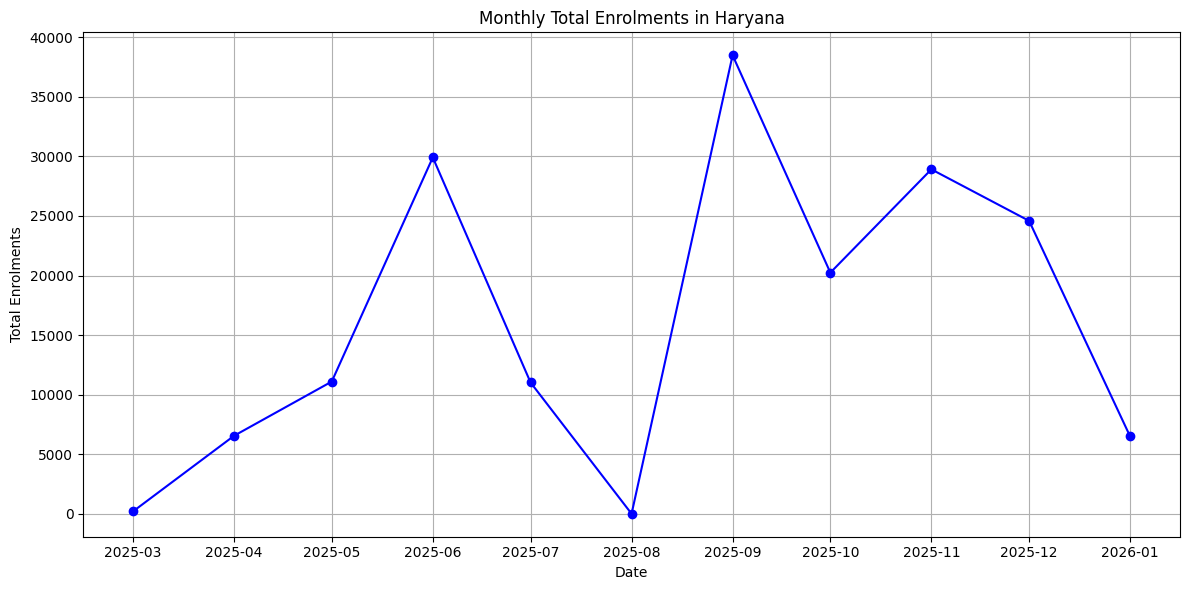

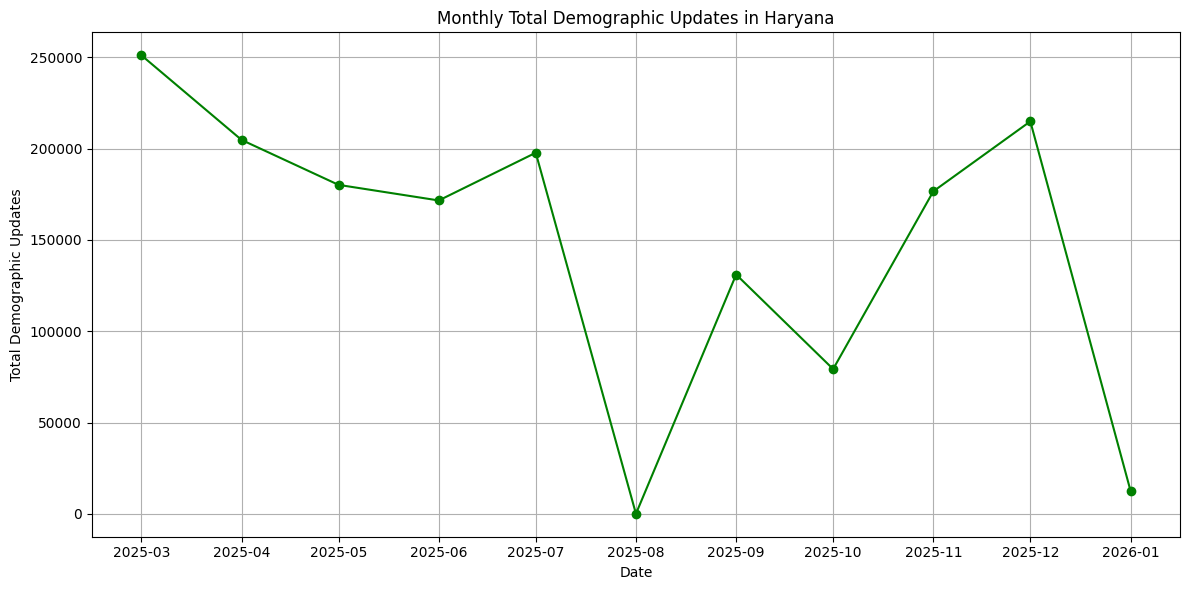

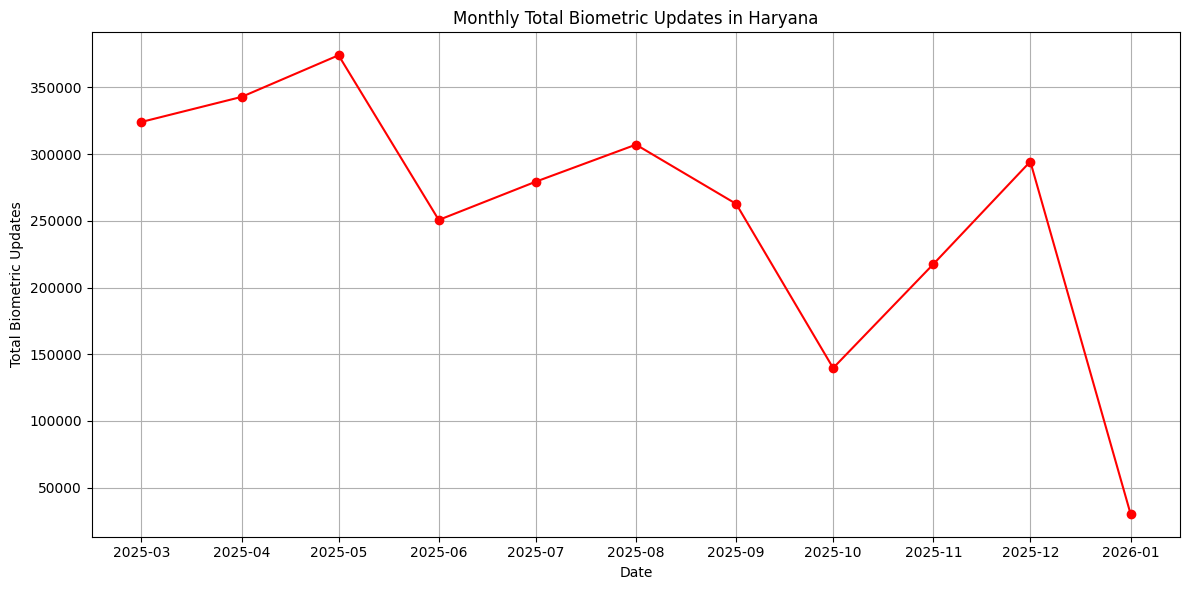

Monthly trend plots generated successfully.


In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

df_hr_monthly_trends = df_hr_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_hr_monthly_trends['date'] = pd.to_datetime(df_hr_monthly_trends['year'].astype(str) + '-' + df_hr_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_hr_monthly_trends = df_hr_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_hr_monthly_trends['date'], df_hr_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Haryana')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_hr_monthly_trends['date'], df_hr_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Haryana')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_hr_monthly_trends['date'], df_hr_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Haryana')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

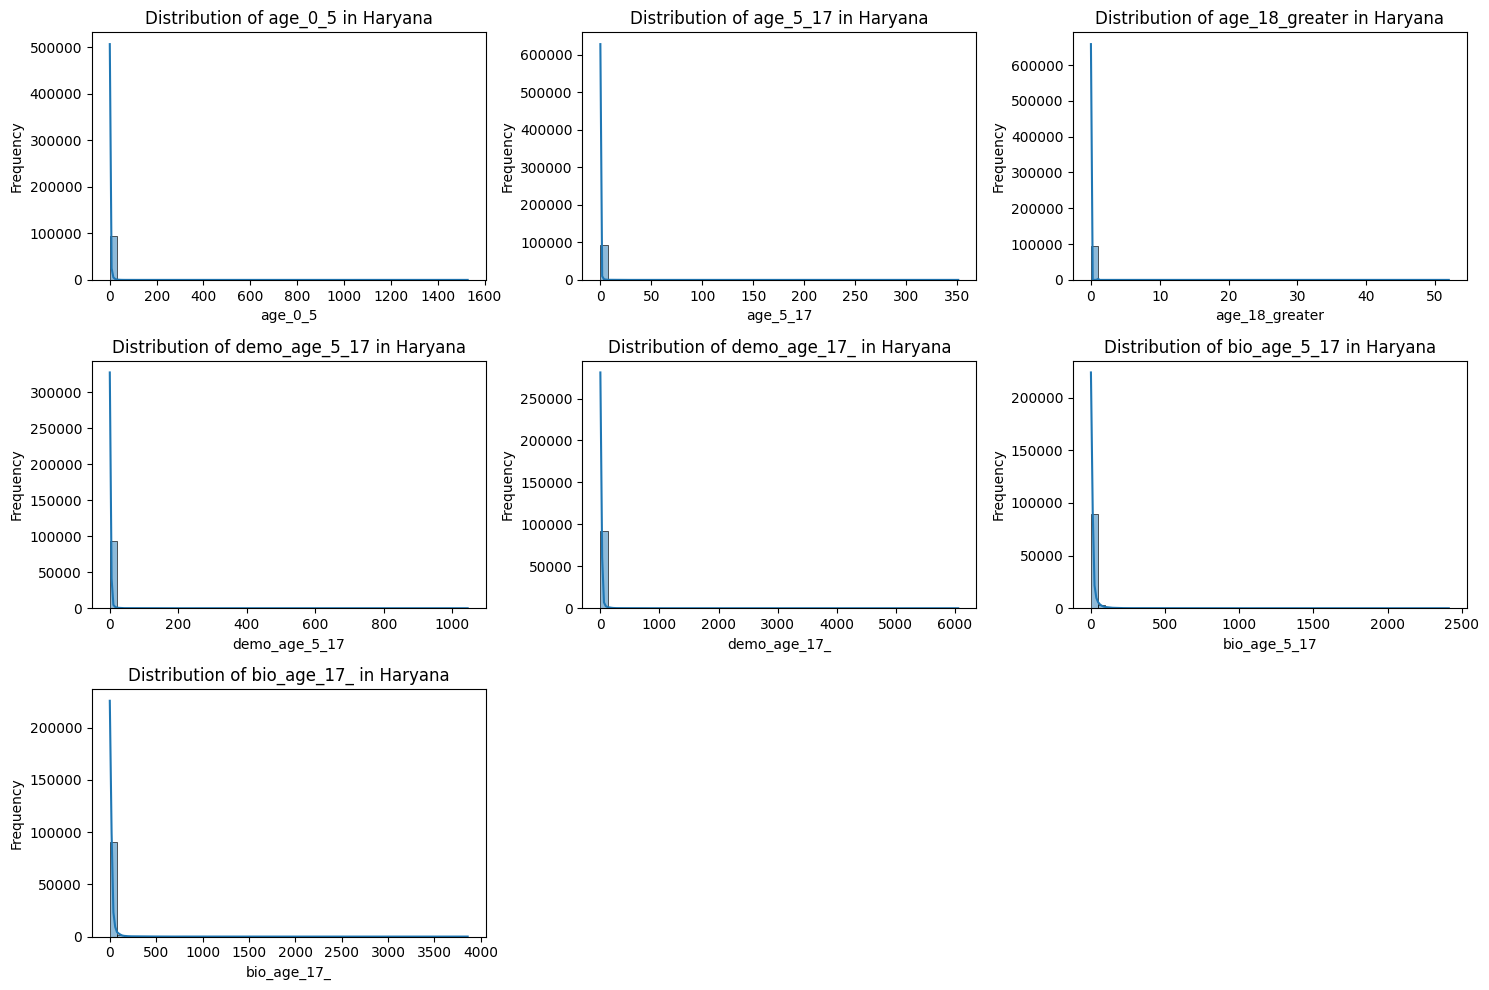

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_merged_hr[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Haryana')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

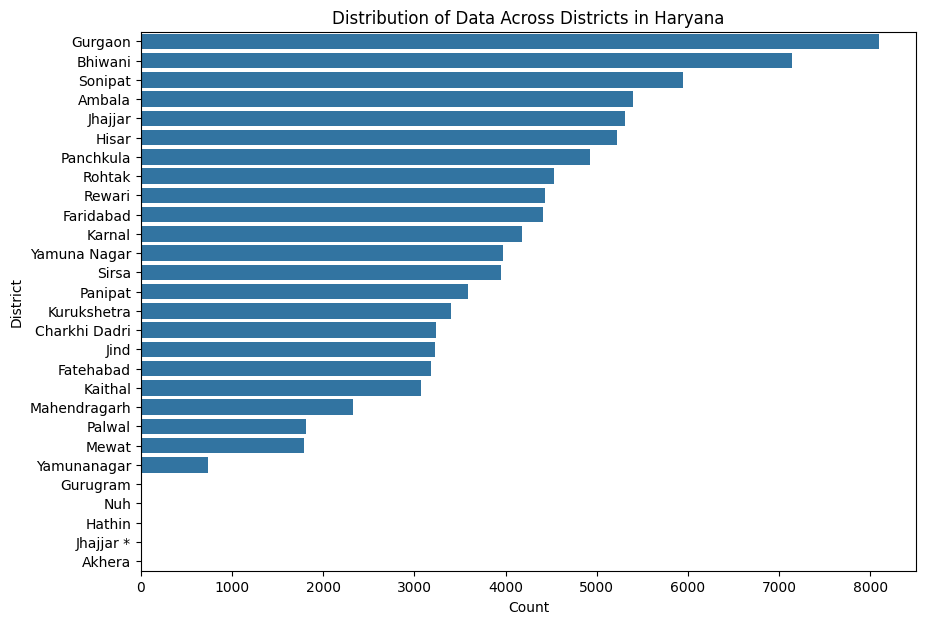

Histograms for numerical age-related columns and count plot for 'district' displayed for Haryana.


In [163]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_merged_hr, y='district', order=df_merged_hr['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Haryana')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Haryana.")

**Bivariate and Trivariate Analysis**

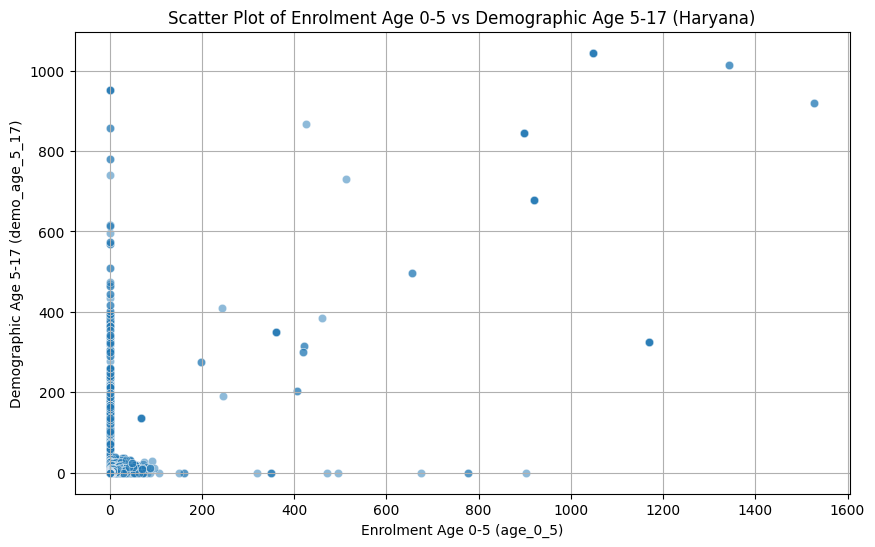

In [164]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_hr, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Haryana)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

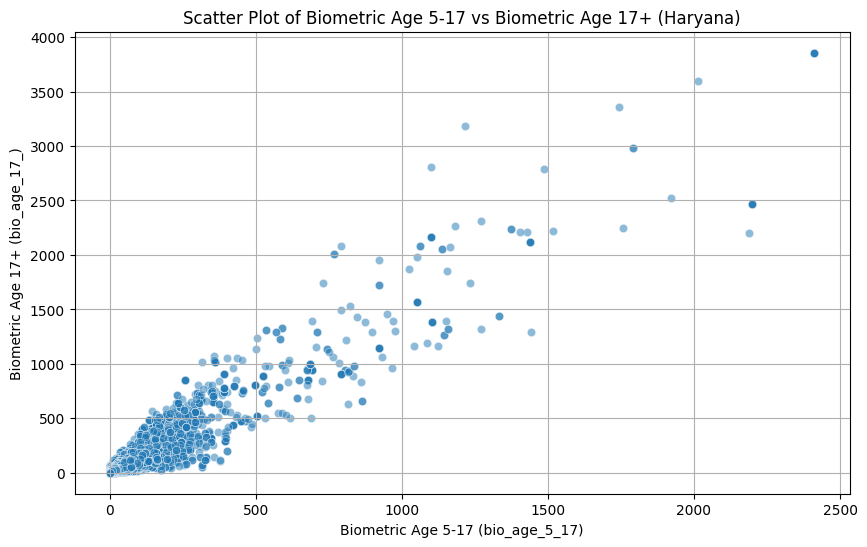

Scatter plots for age-related columns displayed for Haryana.


In [165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_hr, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Haryana)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plots for age-related columns displayed for Haryana.")

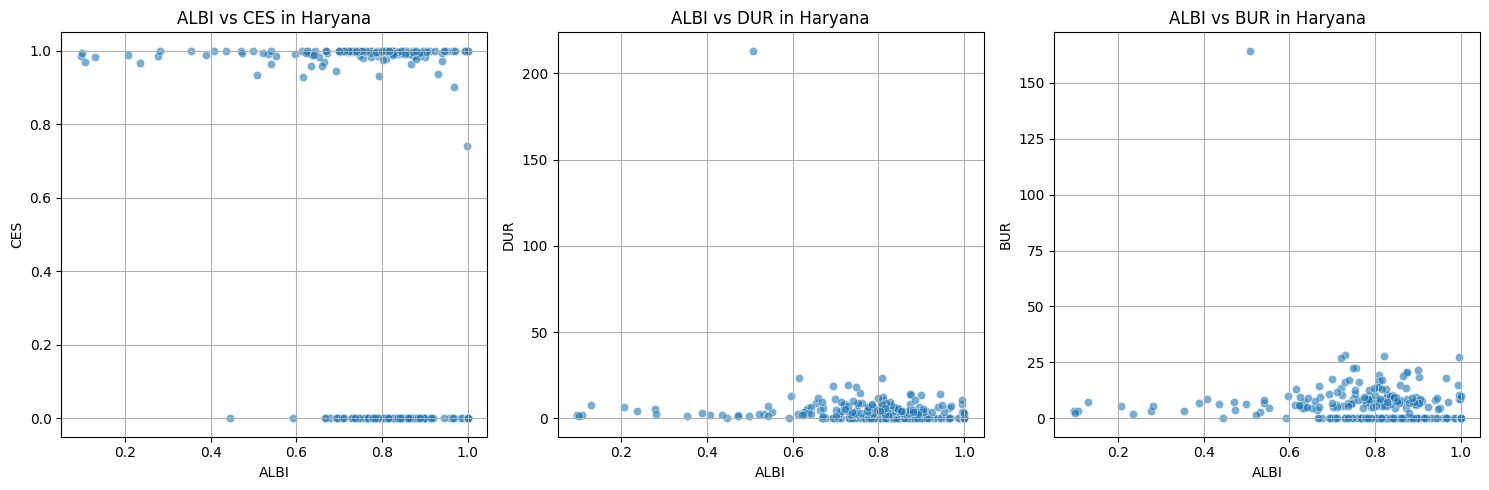

In [166]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_hr_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Haryana')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

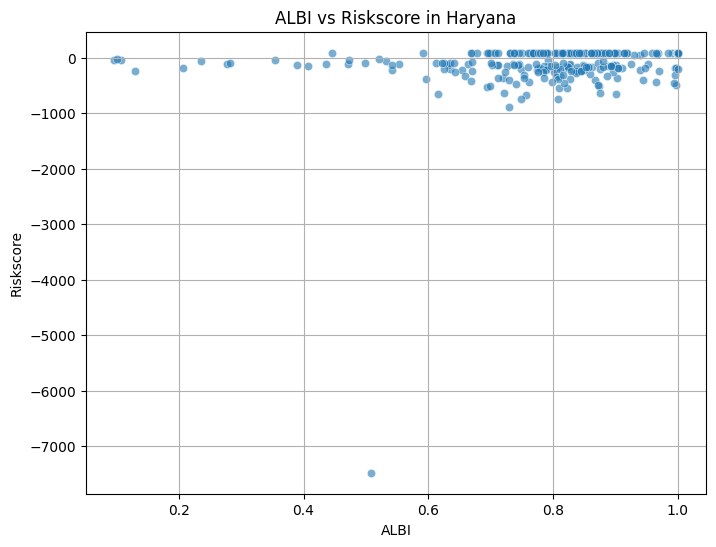

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Haryana.


In [167]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_hr_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Haryana')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Haryana.")

Correlation Matrix for Haryana:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.928152        0.685876       0.538767   
age_5_17        0.928152  1.000000        0.746525       0.542272   
age_18_greater  0.685876  0.746525        1.000000       0.380727   
demo_age_5_17   0.538767  0.542272        0.380727       1.000000   
demo_age_17_    0.506831  0.510785        0.369305       0.976167   
bio_age_5_17    0.232507  0.225779        0.121887       0.657171   
bio_age_17_     0.190518  0.187999        0.103021       0.634907   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.506831      0.232507     0.190518  
age_5_17            0.510785      0.225779     0.187999  
age_18_greater      0.369305      0.121887     0.103021  
demo_age_5_17       0.976167      0.657171     0.634907  
demo_age_17_        1.000000      0.643574     0.624116  
bio_age_5_17        0.643574      1.000000     0.943182  
bio_age_1

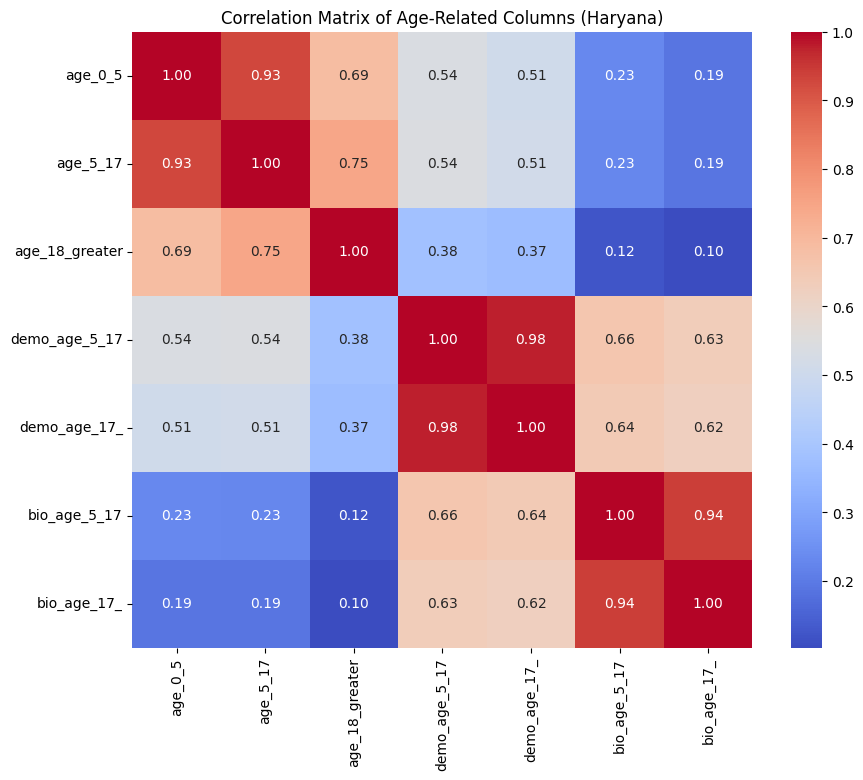

Correlation matrix heatmap for age-related columns displayed for Haryana.


In [168]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_hr = df_merged_hr[numerical_age_cols].corr()

print("Correlation Matrix for Haryana:")
print(correlation_matrix_hr)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_hr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Haryana)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Haryana.")

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define a list named `age_cols_to_group` containing the age-related column names
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# 2. Group the `df_merged_hr` DataFrame by 'district' and calculate the mean for each column in `age_cols_to_group`.
df_hr_district_mean = df_merged_hr.groupby('district')[age_cols_to_group].mean().reset_index()

# 3. Create a new column named 'total_avg_age' in `df_hr_district_mean` by summing all columns in `age_cols_to_group` along `axis=1`.
df_hr_district_mean['total_avg_age'] = df_hr_district_mean[age_cols_to_group].sum(axis=1)

# 4. Select the top 10 districts from `df_hr_district_mean` based on the 'total_avg_age' column, sorting in descending order.
df_hr_district_mean_top10 = df_hr_district_mean.nlargest(10, 'total_avg_age')

print("Top 10 districts by total average age-related counts for Haryana:")
print(df_hr_district_mean_top10[['district', 'total_avg_age']])

# 5. Melt the `df_hr_district_mean_top10` DataFrame
df_hr_district_mean_melted = df_hr_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

Top 10 districts by total average age-related counts for Haryana:
     district  total_avg_age
18        Nuh     753.000000
7    Gurugram     376.571429
17      Mewat     128.844221
19     Palwal     124.643330
4   Faridabad     112.062798
21    Panipat      73.767967
12       Jind      68.995349
13    Kaithal      62.455700
24      Sirsa      60.587788
14     Karnal      58.632033


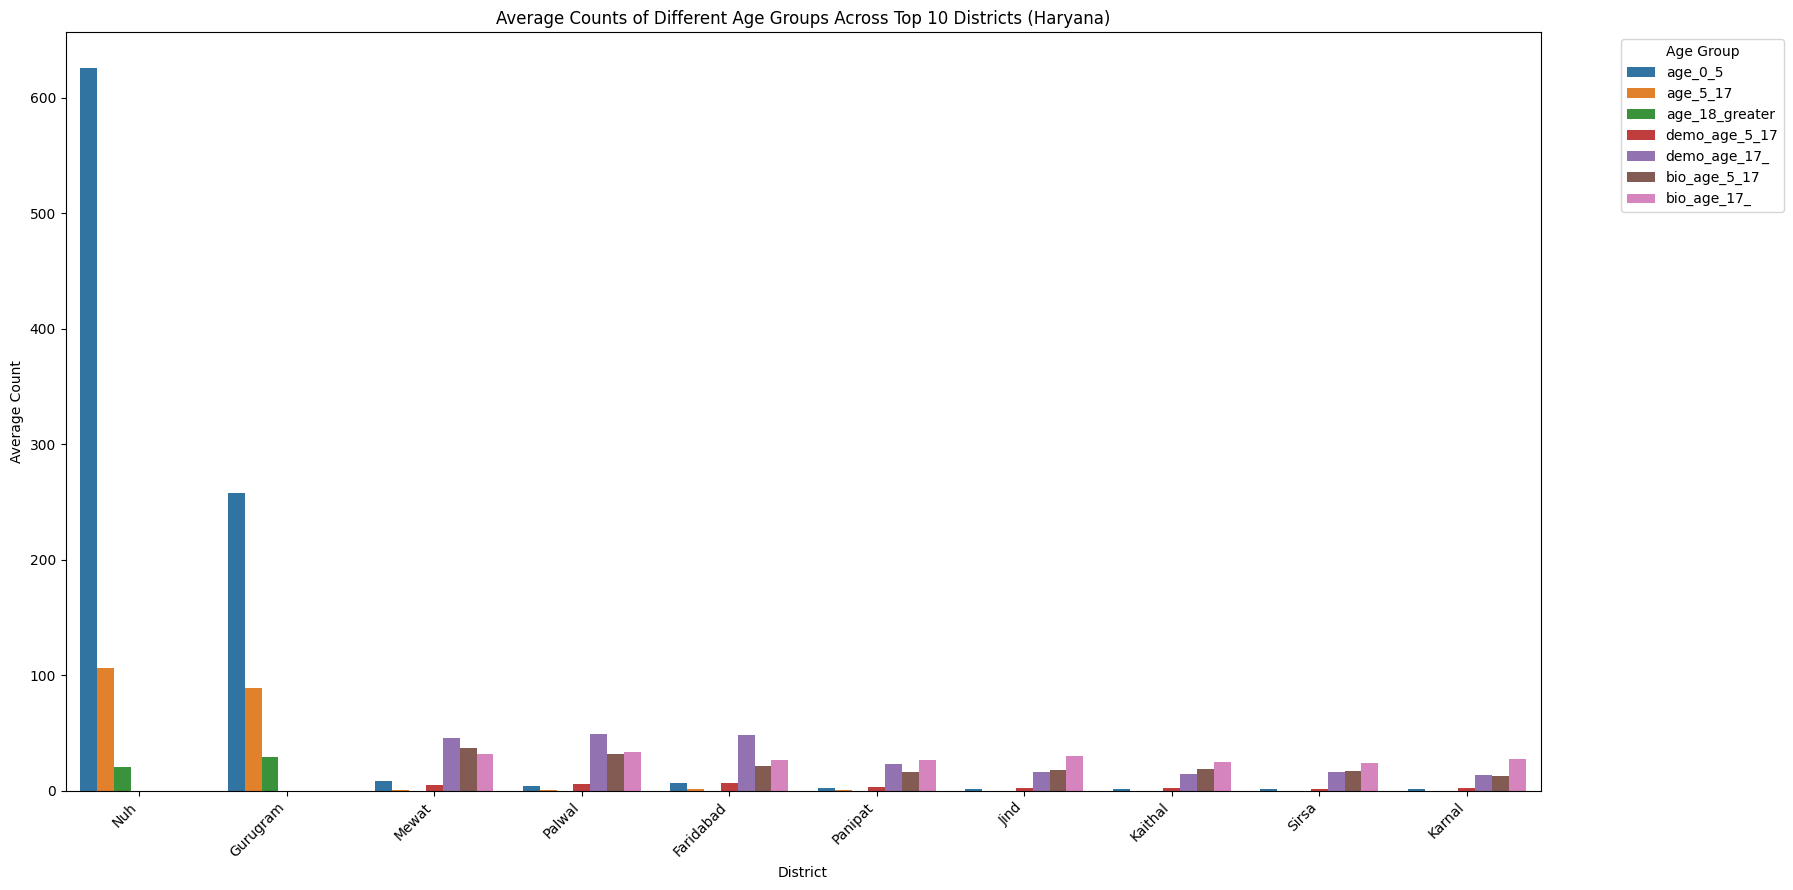

Grouped bar chart for average age-related counts across top 10 districts displayed for Haryana.


In [170]:
plt.figure(figsize=(18, 9))
sns.barplot(data=df_hr_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')

# 8. Add a title to the plot: 'Average Counts of Different Age Groups Across Top 10 Districts (Haryana)'.
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Haryana)')

# 9. Label the x-axis as 'District' and the y-axis as 'Average Count'.
plt.xlabel('District')
plt.ylabel('Average Count')

# 10. Rotate x-axis labels by 45 degrees and align them to the right.
plt.xticks(rotation=45, ha='right')

# 11. Add a legend with the title 'Age Group' and place it outside the plot area.
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# 12. Ensure the layout is tight and display the plot.
plt.tight_layout()
plt.show()

print("Grouped bar chart for average age-related counts across top 10 districts displayed for Haryana.")

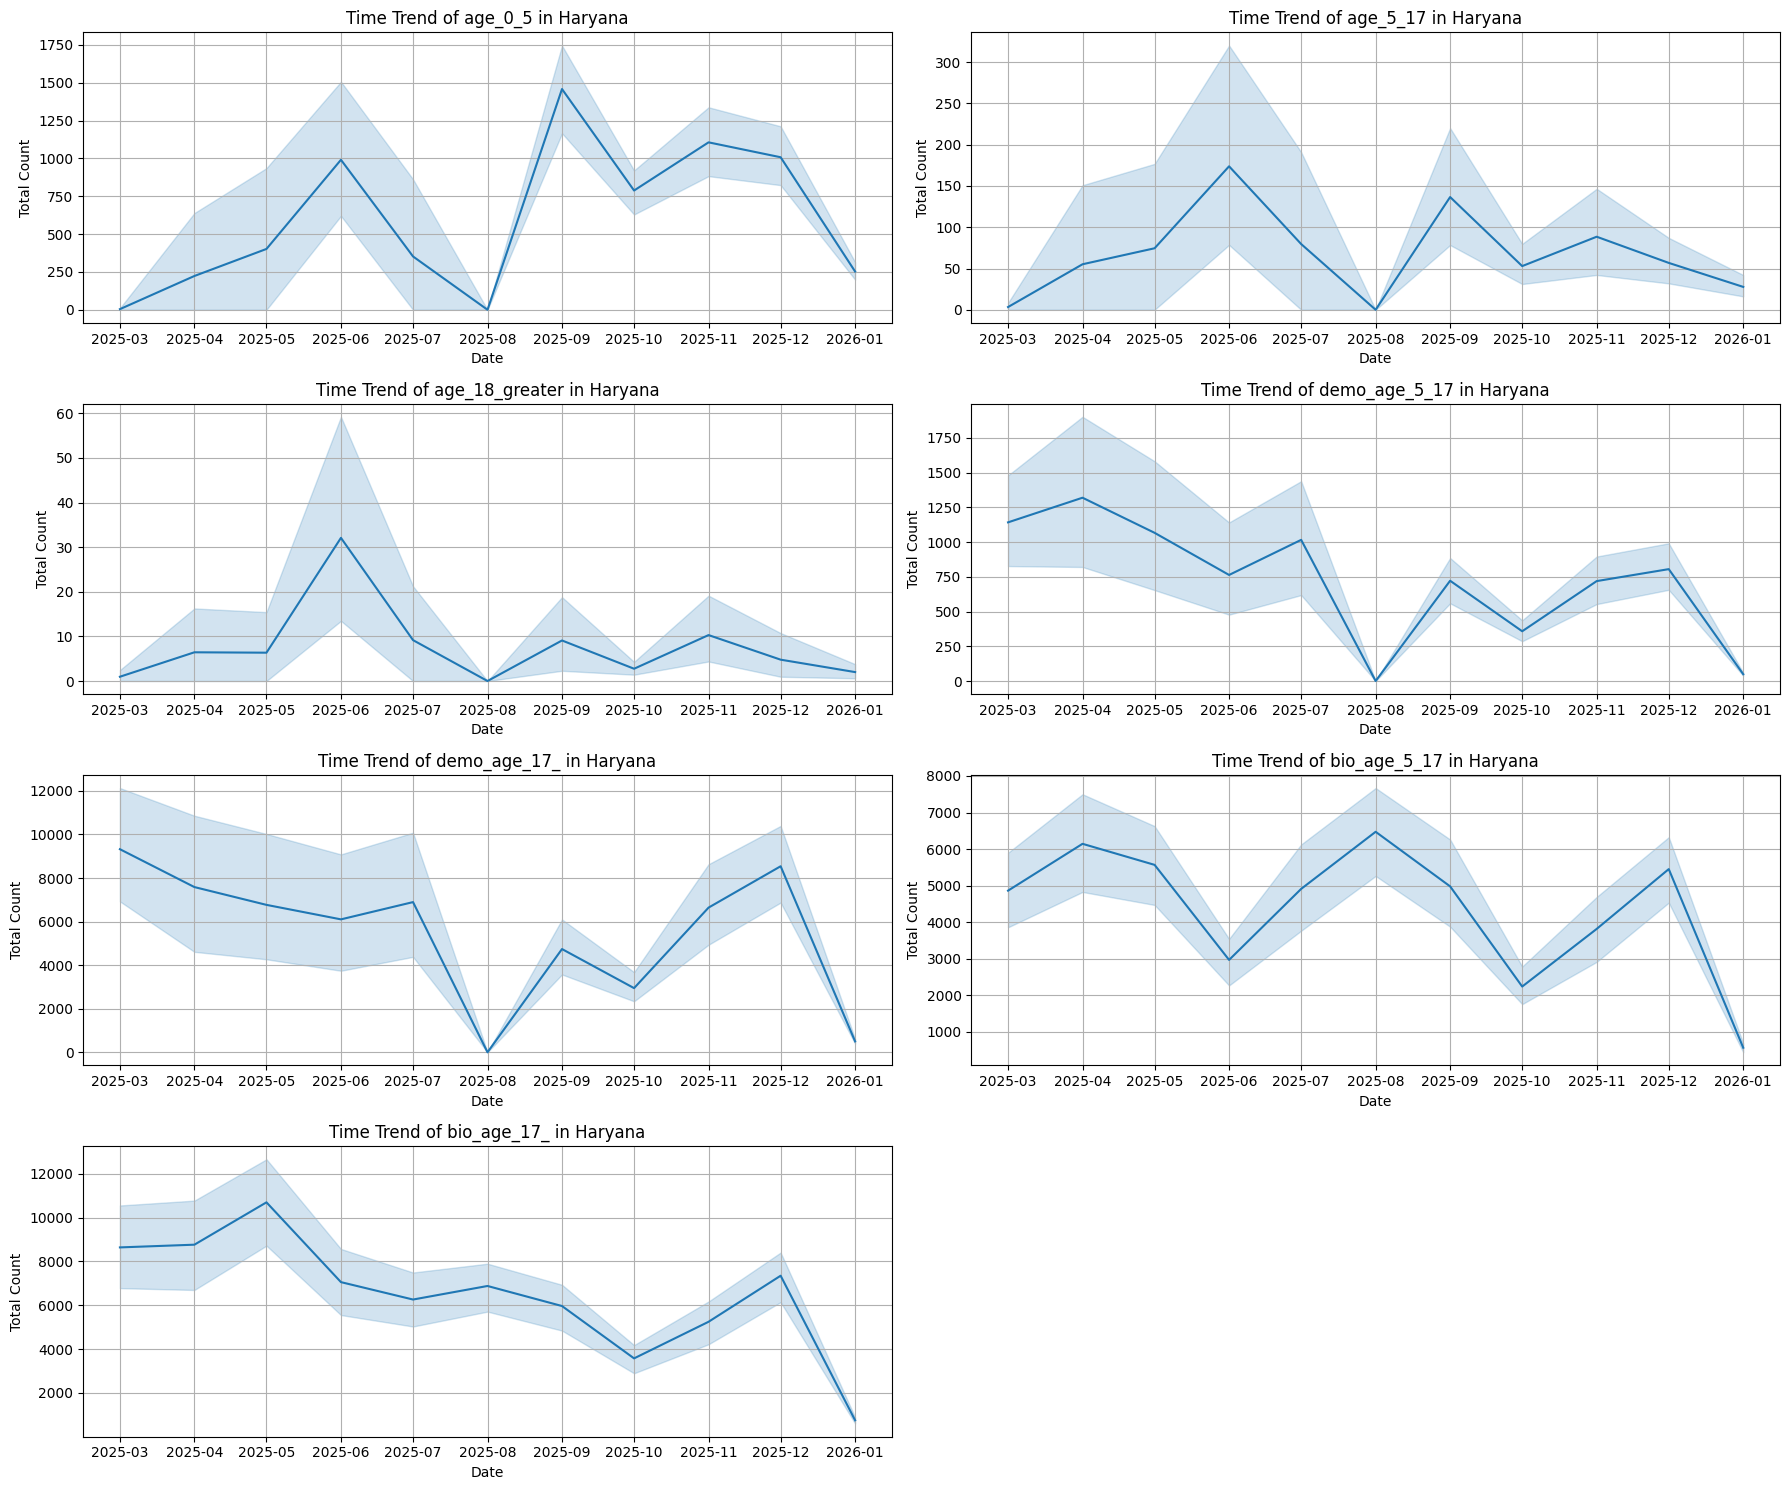

Monthly trend plots generated successfully for each age-related column in Haryana.


In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a 'date' column in df_hr_agg
df_hr_agg['date'] = pd.to_datetime(df_hr_agg['year'].astype(str) + '-' + df_hr_agg['month'].astype(str) + '-01')

# 2. Sort df_hr_agg by the new 'date' column
df_hr_agg = df_hr_agg.sort_values(by='date')

# Define the age-related columns for plotting
age_cols_to_plot = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# 3. Create a set of line plots for each age-related column
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_plot):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns (7 columns, so 4 rows, 2 columns)
    sns.lineplot(data=df_hr_agg, x='date', y=col)
    plt.title(f'Time Trend of {col} in Haryana')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully for each age-related column in Haryana.")

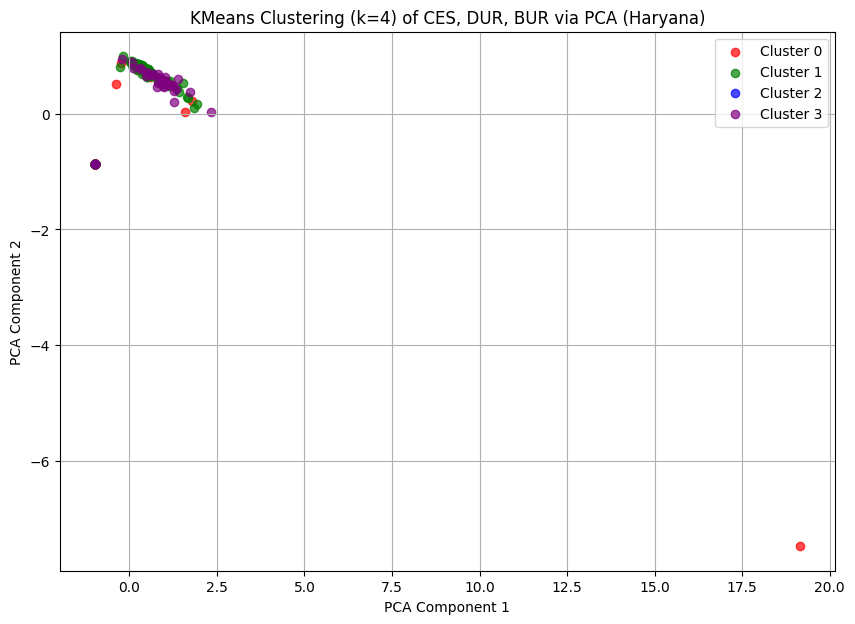

First 5 rows of df_hr_agg with 'clusterlabel' column:
    year  month    state      district  age_0_5  age_5_17  age_18_greater  \
0   2025      3  Haryana        Ambala      0.0       0.0             0.0   
23  2025      3  Haryana   Yamunanagar      0.0       0.0             0.0   
22  2025      3  Haryana  Yamuna Nagar      0.0       0.0             0.0   
21  2025      3  Haryana       Sonipat      0.0       0.0             0.0   
20  2025      3  Haryana         Sirsa      0.0       0.0             0.0   

    demo_age_5_17  demo_age_17_  bio_age_5_17  ...   stdnorm      ALBI  \
0           449.0        3820.0        3761.0  ...  0.146921  0.853079   
23            0.0           0.0          14.0  ...  0.000948  0.999052   
22         1642.0       12873.0        6754.0  ...  0.306555  0.693445   
21         1255.0       10219.0        5338.0  ...  0.232825  0.767175   
20          565.0        5497.0        4370.0  ...  0.156810  0.843190   

    Enormrisk  CESrisknorm  DURrisknor

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_hr_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_hr_agg
df_hr_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_hr_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Haryana)')
plt.legend()
plt.grid(True)
plt.show()

# 8. Print the first 5 rows of df_hr_agg with 'clusterlabel' column:
print("First 5 rows of df_hr_agg with 'clusterlabel' column:")
print(df_hr_agg.head())

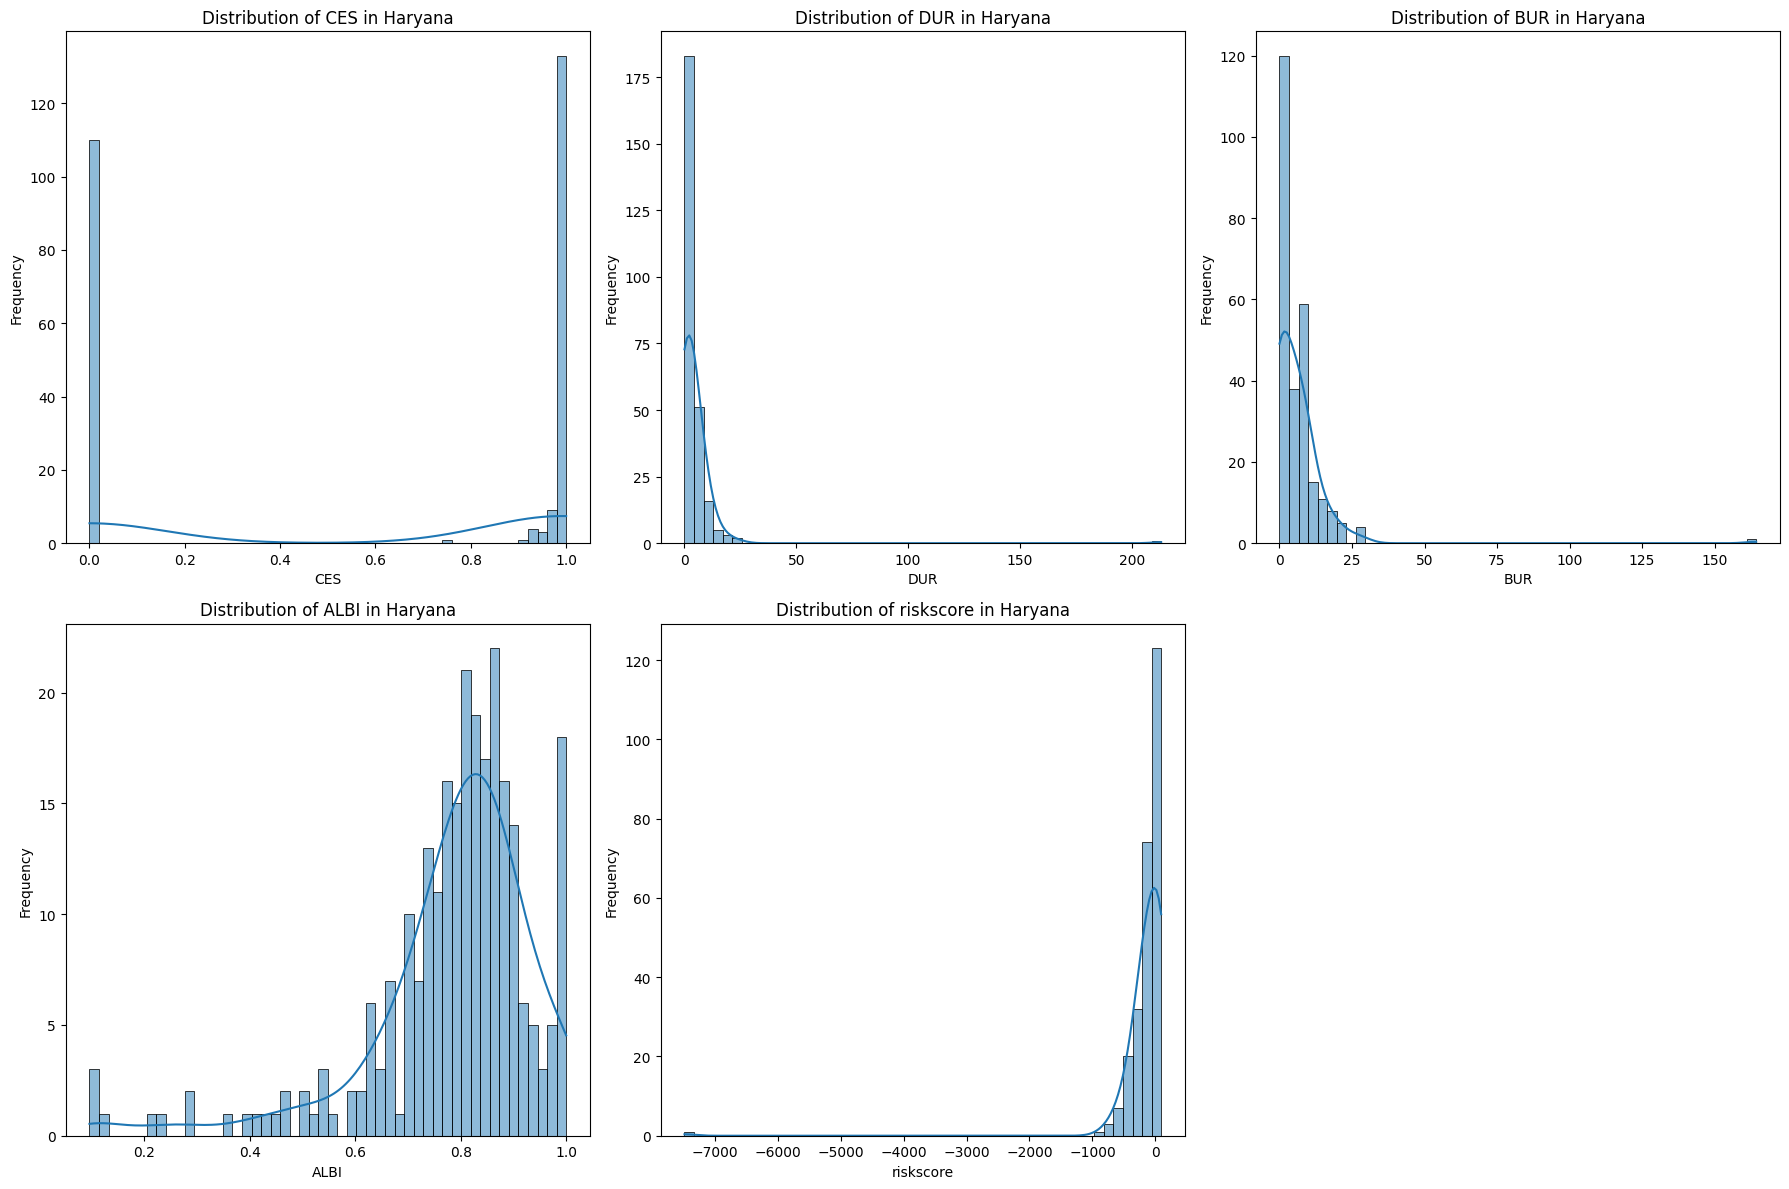

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Haryana.


In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_hr_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Haryana')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Haryana.")

In [174]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_hr_agg['year'].max()
latest_month = df_hr_agg[df_hr_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_hr_agg for the latest year and month
df_latest_month = df_hr_agg[(df_hr_agg['year'] == latest_year) & (df_hr_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
     district  CES
       Palwal  1.0
       Rohtak  1.0
        Sirsa  1.0
         Jind  1.0
      Jhajjar  1.0
        Hisar  1.0
  Kurukshetra  1.0
       Karnal  1.0
  Yamunanagar  1.0
Charkhi Dadri  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
    district      CES
     Gurgaon 0.969492
   Panchkula 0.974684
   Faridabad 0.985294
Yamuna Nagar 0.988417
      Rewari 0.989130
     Kaithal 0.989130
     Sonipat 0.992481
     Panipat 0.994100
       Mewat 0.994490
Mahendragarh 0.994872

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
     district      DUR
    Panchkula 4.177215
Charkhi Dadri 3.734375
 Yamuna Nagar 3.042471
  Yamunanagar 3.000000
      Kaithal 2.831522
  Kurukshetra 2.594595
        Hisar 2.537396
      Panipat 2.483776
       Rewari 2.445652
    Fatehabad 2.268041

Bottom 10 Districts by DUR (Year 2026, Month 1):
 district      D

## Summary (Haryana):

The Aadhaar lifecycle analysis for Haryana provides a detailed view of enrolment and update activities across its districts. The `df_hr_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_merged_hr` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, some negative risk scores were observed, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups (`age_0_5` and `age_5_17`), and similarly within demographic (`demo_age_5_17` and `demo_age_17_`) and biometric (`bio_age_5_17` and `bio_age_17_`) update categories. Correlations between enrolment figures and update figures were generally weaker.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Several districts (Palwal, Rohtak, Sirsa, Jind, Jhajjar, Hisar, Kurukshetra, Karnal, Yamunanagar, Charkhi Dadri) achieved a perfect CES of 1.0, indicating all enrolments were child enrolments in the latest period. Gurgaon (0.969) and Panchkula (0.975) had the lowest CES, followed by Faridabad (0.985).
    *   **DUR (Demographic Update Rate)**: Panchkula (4.177) and Charkhi Dadri (3.734) showed the highest DUR, suggesting strong demographic update activity relative to enrolments. Sonipat (1.138) and Rohtak (1.210) had the lowest DURs.
    *   **BUR (Biometric Update Rate)**: Yamunanagar (10.0) and Karnal (8.449) showed the highest BURs. Panipat (1.584) and Mewat (2.358) were among the lowest, indicating less frequent biometric updates relative to enrolments.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Yamunanagar (1.0) and Charkhi Dadri (0.880) exhibited the best balance, close to 1. Faridabad (0.097) and Mewat (0.101) had the lowest balance.
    *   **Risk Score**: Mewat (-18.65) and Panipat (-20.99) showed the highest (least negative) risk scores. Similar to other states, a majority of districts displayed significant negative risk scores, notably Yamunanagar (-200.0) and Karnal (-140.55), reinforcing the need to re-evaluate this metric's calculation.

8.  **Clustering Analysis**: KMeans clustering successfully grouped districts into four distinct clusters based on their CES, DUR, and BUR metrics. The PCA visualization revealed these clusters spatially, providing insights into different operational profiles and performance levels across Haryana's districts.

### Conclusion:

Haryana presents a varied landscape in Aadhaar lifecycle management, with districts showing a mix of high child enrolment rates and diverse performance in demographic and biometric updates. The persistent issue with negative `riskscore` values across multiple states, including Haryana, necessitates a critical review and potential recalculation of this metric to ensure its accuracy and utility. Targeted interventions should focus on districts with low update rates and imbalanced ALBI values to improve overall Aadhaar data quality and lifecycle management.